In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
path = 'CANDY-HIERARCHY-2015-SURVEY-Responses.csv'
dt = pd.read_csv(path)
dt.head()

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
0,10/23/2015 8:46:20,35,No,JOY,NaN,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/23/2015 8:46:52,41,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/23/2015 8:47:34,33,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/23/2015 8:47:59,31,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/23/2015 8:48:12,30,No,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
type(dt['How old are you?'][36])

float

In [104]:
dt.shape

(5630, 124)

In [105]:
def allnans(df):
    return df if type(df)==int else None

In [106]:
#dt['How old are you?'] = dt['How old are you?'].apply(allnans)
dt['How old are you?'] = dt['How old are you?'].dropna()
dt['How old are you?'].shape


(5630,)

In [107]:
dt['How old are you?'][57]

'enough'

In [108]:
ages = dt['How old are you?'].dropna()

In [109]:
ages.head()


0    35
1    41
2    33
3    31
4    30
Name: How old are you?, dtype: object

In [110]:
correctages = dt[pd.to_numeric(dt['How old are you?'], errors='coerce').notnull()]

In [111]:
correctages.shape

(5346, 124)

In [112]:
correctages = pd.to_numeric(correctages["How old are you?"])

In [113]:
correctages

0       35.0
1       41.0
2       33.0
3       31.0
4       30.0
        ... 
5625    50.0
5626    43.0
5627    35.0
5628    38.0
5629    44.0
Name: How old are you?, Length: 5346, dtype: float64

In [129]:
actualages = correctages[correctages["How old are you?"]<120]

In [130]:
actualages

,How old are you?
0,35.0
1,41.0
2,33.0
3,31.0
4,30.0
...,...
5625,50.0
5626,43.0
5627,35.0
5628,38.0


array([[<AxesSubplot:title={'center':'How old are you?'}>]], dtype=object)

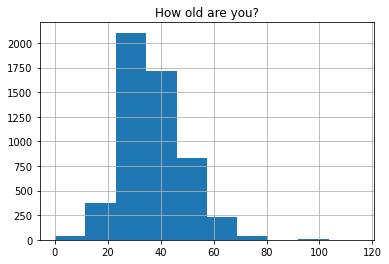

In [131]:
actualages.hist()

In [133]:
zscores = actualages
zscores['z_score']=stats.zscore(zscores['How old are you?'])

C:\Users\lowde\AppData\Local\Temp/ipykernel_5952/3179182728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscores['z_score']=stats.zscore(zscores['How old are you?'])


In [139]:
zscores['z_score']=stats.zscore(zscores['How old are you?'])

C:\Users\lowde\AppData\Local\Temp/ipykernel_5952/1136934107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zscores['z_score']=stats.zscore(zscores['How old are you?'])


In [1]:
zscores

NameError: name 'zscores' is not defined

In [141]:
zscores.loc[zscores['z_score'].abs()>3]

,How old are you?,z_score
464,75.00,3.295659
680,74.00,3.209207
681,74.00,3.209207
888,72.00,3.036302
1130,99.00,5.370517
1279,72.00,3.036302
1287,72.00,3.036302
1561,77.00,3.468564
1564,74.00,3.209207
1569,75.00,3.295659


In [142]:
correctages

,How old are you?
0,35.0
1,41.0
2,33.0
3,31.0
4,30.0
...,...
5625,50.0
5626,43.0
5627,35.0
5628,38.0
